In [43]:
import pandas as pd
import numpy as np
import datetime
import re
from dateutil.parser import parse
import glob
import sys
import openpyxl as opx
import xlrd

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed,GRU, Conv1D

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# KPEB1 데이터 추출

In [58]:
df_kpeb1 = pd.read_csv('./211105_kpeb1.csv', parse_dates = True)

In [59]:
df_kpeb1.drop(['Unnamed: 0'], inplace = True, axis =1 )

In [60]:
df_kpeb1['Time']= pd.to_datetime(df_kpeb1['Time'])

In [61]:
df_kpeb1

,Time,Cons_kpeb1(W),Prod_kpeb1(W),Cons_acc_kpeb1(Wh),Prod_acc_kpeb1(Wh),denominator,denominator_acc,SCF,LCF,SCF_acc,LCF_acc,self_sustain,Avg_SCF&LCF
0,2021-09-13 00:00:00,5695.0,0.0,9.491667e+01,0.000000e+00,0.0,0.000000e+00,NaN,0.000000,NaN,0.000000,0.000000,NaN
1,2021-09-13 00:01:00,5284.0,0.0,1.829833e+02,0.000000e+00,0.0,0.000000e+00,NaN,0.000000,NaN,0.000000,0.000000,NaN
2,2021-09-13 00:03:00,5551.0,0.0,2.755000e+02,0.000000e+00,0.0,0.000000e+00,NaN,0.000000,NaN,0.000000,0.000000,NaN
3,2021-09-13 00:06:00,4703.0,0.0,3.538833e+02,0.000000e+00,0.0,0.000000e+00,NaN,0.000000,NaN,0.000000,0.000000,NaN
4,2021-09-13 00:11:00,5248.0,0.0,4.413500e+02,0.000000e+00,0.0,0.000000e+00,NaN,0.000000,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66366,2021-11-04 16:28:00,8995.0,1797.0,8.674526e+06,5.592994e+06,1797.0,5.592994e+06,1.0,0.199778,1.0,0.644761,0.644761,0.822380
66367,2021-11-04 16:29:00,10006.0,1726.0,8.674693e+06,5.593023e+06,1726.0,5.593023e+06,1.0,0.172497,1.0,0.644752,0.644752,0.822376
66368,2021-11-04 16:30:00,10279.0,1666.0,8.674864e+06,5.593051e+06,1666.0,5.593051e+06,1.0,0.162078,1.0,0.644742,0.644742,0.822371
66369,2021-11-04 16:31:00,10606.0,1614.0,8.675041e+06,5.593078e+06,1614.0,5.593078e+06,1.0,0.152178,1.0,0.644732,0.644732,0.822366


# KPEB2 데이터 추출

In [62]:
df_kpeb2 = pd.read_csv('./211105_kpeb2.csv', parse_dates = True)

In [63]:
df_kpeb2.drop(['Unnamed: 0'], inplace = True, axis =1 )

In [64]:
df_kpeb2['Time']= pd.to_datetime(df_kpeb2['Time'])

In [65]:
df_kpeb2

,Time,Cons_kpeb2(W),Prod_kpeb2(W),Cons_acc_kpeb2(Wh),Prod_acc_kpeb2(Wh),denominator,denominator_acc,SCF,LCF,SCF_acc,LCF_acc,self_sustain,Avg_SCF&LCF
0,2021-09-13 00:01:00,25.0,0.0,0.416667,0.000000,0.0,0.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN
1,2021-09-13 00:03:00,25.0,0.0,0.833333,0.000000,0.0,0.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN
2,2021-09-13 00:04:00,25.0,0.0,1.250000,0.000000,0.0,0.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN
3,2021-09-13 00:05:00,24.0,1.0,1.650000,0.016667,1.0,0.016667,1.000000,0.041667,1.000000,0.010101,0.010101,0.505051
4,2021-09-13 00:06:00,23.0,0.0,2.033333,0.016667,0.0,0.016667,NaN,0.000000,1.000000,0.008197,0.008197,0.504098
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66300,2021-11-04 16:28:00,130.0,171.0,110934.600000,666993.850000,130.0,110934.600000,0.760234,1.000000,0.166320,1.000000,6.012496,0.583160
66301,2021-11-04 16:29:00,131.0,165.0,110936.783333,666996.600000,131.0,110936.783333,0.793939,1.000000,0.166323,1.000000,6.012403,0.583161
66302,2021-11-04 16:30:00,130.0,162.0,110938.950000,666999.300000,130.0,110938.950000,0.802469,1.000000,0.166325,1.000000,6.012309,0.583163
66303,2021-11-04 16:31:00,130.0,158.0,110941.116667,667001.933333,130.0,110941.116667,0.822785,1.000000,0.166328,1.000000,6.012216,0.583164


# KPEB합치기

In [66]:
df_kpeb = pd.DataFrame()
df_kpeb['Time'] = df_kpeb1['Time']

In [67]:
df_kpeb=df_kpeb.set_index('Time')
df_kpeb1=df_kpeb1.set_index('Time')
df_kpeb2=df_kpeb2.set_index('Time')

In [68]:
df_kpeb['Cons_kpeb(W)'] = df_kpeb1['Cons_kpeb1(W)']+df_kpeb2['Cons_kpeb2(W)']
df_kpeb['Prod_kpeb(W)'] = df_kpeb1['Prod_kpeb1(W)']+df_kpeb2['Prod_kpeb2(W)']
df_kpeb['Cons_acc_kpeb(Wh)'] = df_kpeb1['Cons_acc_kpeb1(Wh)']+df_kpeb2['Cons_acc_kpeb2(Wh)']
df_kpeb['Prod_acc_kpeb(Wh)'] = df_kpeb1['Prod_acc_kpeb1(Wh)']+df_kpeb2['Prod_acc_kpeb2(Wh)']

In [69]:
df_kpeb['denominator'] = df_kpeb.loc[:,['Cons_kpeb(W)','Prod_kpeb(W)']].min(axis=1)
df_kpeb['denominator_acc'] = df_kpeb.loc[:,['Cons_acc_kpeb(Wh)','Prod_acc_kpeb(Wh)']].min(axis=1)

In [70]:
df_kpeb['SCF'] = df_kpeb['denominator']/df_kpeb['Prod_kpeb(W)']
df_kpeb['LCF'] = df_kpeb['denominator']/df_kpeb['Cons_kpeb(W)']

In [72]:
df_kpeb['SCF_acc'] = df_kpeb['denominator_acc']/df_kpeb['Prod_acc_kpeb(Wh)']
df_kpeb['LCF_acc'] = df_kpeb['denominator_acc']/df_kpeb['Cons_acc_kpeb(Wh)']
df_kpeb['self_sustain'] = df_kpeb['Prod_acc_kpeb(Wh)']/df_kpeb['Cons_acc_kpeb(Wh)']
df_kpeb['Avg_SCF&LCF'] = (df_kpeb['SCF_acc']+df_kpeb['LCF_acc'])/2

In [73]:
df_kpeb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66371 entries, 2021-09-13 00:00:00 to 2021-11-04 16:32:00
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cons_kpeb(W)       65592 non-null  float64
 1   Prod_kpeb(W)       65592 non-null  float64
 2   Cons_acc_kpeb(Wh)  65592 non-null  float64
 3   Prod_acc_kpeb(Wh)  65592 non-null  float64
 4   denominator        65592 non-null  float64
 5   denominator_acc    65592 non-null  float64
 6   SCF                40802 non-null  float64
 7   LCF                65587 non-null  float64
 8   SCF_acc            65590 non-null  float64
 9   LCF_acc            65592 non-null  float64
 10  self_sustain       65592 non-null  float64
 11  Avg_SCF&LCF        65590 non-null  float64
dtypes: float64(12)
memory usage: 6.6 MB


In [74]:
df_kpeb

,Cons_kpeb(W),Prod_kpeb(W),Cons_acc_kpeb(Wh),Prod_acc_kpeb(Wh),denominator,denominator_acc,SCF,LCF,SCF_acc,LCF_acc,self_sustain,Avg_SCF&LCF
Time,,,,,,,,,,,,
2021-09-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-13 00:01:00,5309.0,0.0,1.834000e+02,0.000000e+00,0.0,0.000000e+00,NaN,0.000000,NaN,0.000000,0.000000,NaN
2021-09-13 00:03:00,5576.0,0.0,2.763333e+02,0.000000e+00,0.0,0.000000e+00,NaN,0.000000,NaN,0.000000,0.000000,NaN
2021-09-13 00:06:00,4726.0,0.0,3.559167e+02,1.666667e-02,0.0,1.666667e-02,NaN,0.000000,1.0,0.000047,0.000047,0.500023
2021-09-13 00:11:00,5273.0,0.0,4.450333e+02,1.666667e-02,0.0,1.666667e-02,NaN,0.000000,1.0,0.000037,0.000037,0.500019
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-04 16:28:00,9125.0,1968.0,8.785460e+06,6.259988e+06,1968.0,6.259988e+06,1.0,0.215671,1.0,0.712540,0.712540,0.856270
2021-11-04 16:29:00,10137.0,1891.0,8.785629e+06,6.260020e+06,1891.0,6.260020e+06,1.0,0.186544,1.0,0.712529,0.712529,0.856265
2021-11-04 16:30:00,10409.0,1828.0,8.785803e+06,6.260050e+06,1828.0,6.260050e+06,1.0,0.175617,1.0,0.712519,0.712519,0.856259


In [77]:
df_kpeb.to_csv('./211105_kpeb1&2.csv')

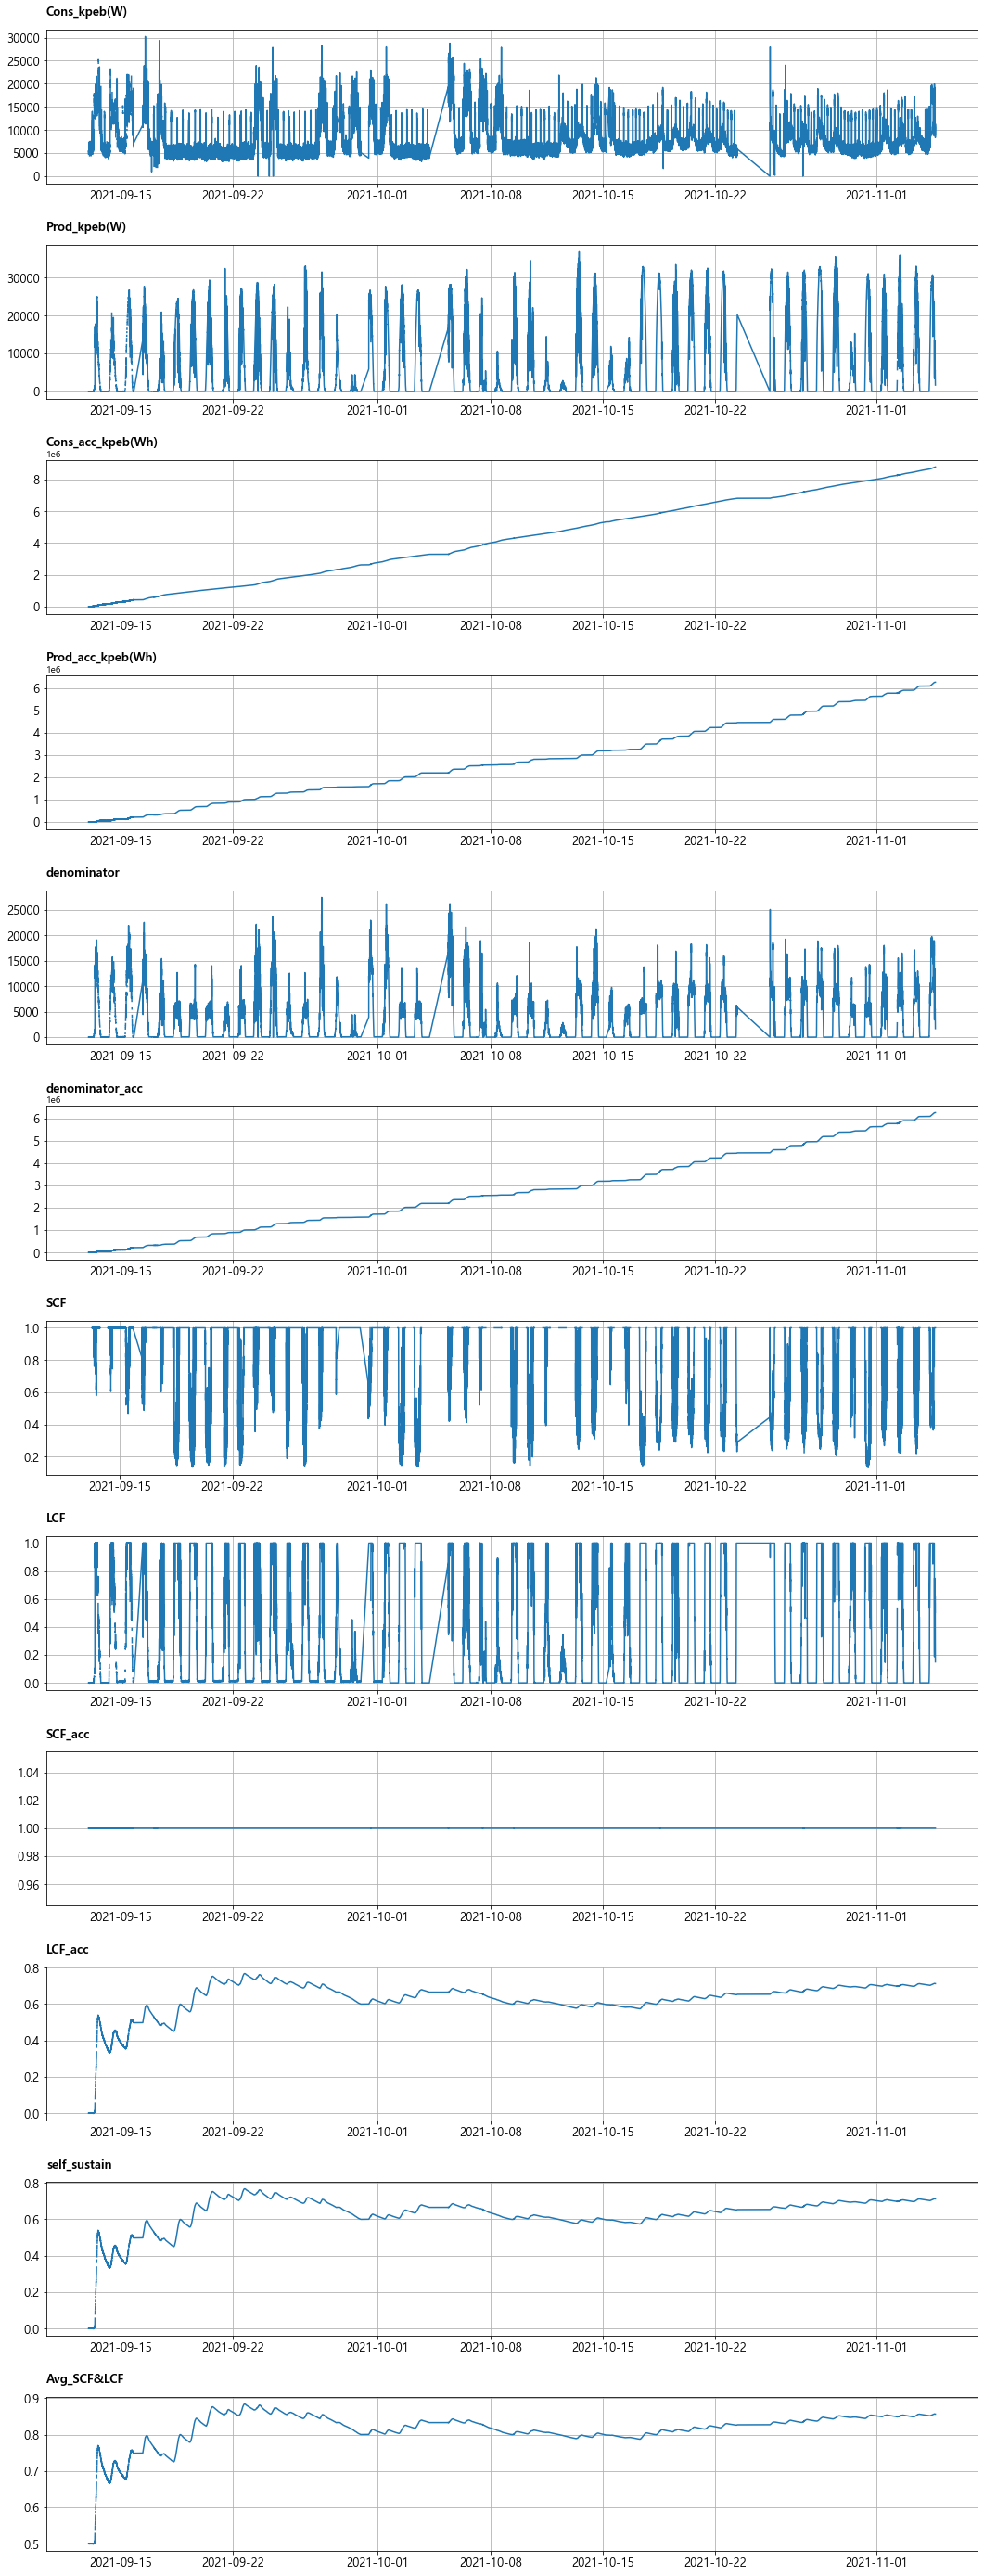

In [76]:
fig, ax = plt.subplots(figsize=(18,50))

for i in range(len(df_kpeb.columns)):
    plt.subplot(len(df_kpeb.columns), 1, i+1)
    plt.subplots_adjust(hspace=0.4)
    name = df_kpeb.columns[i]
    plt.plot(df_kpeb[name])    
    plt.title(name, loc = 'left', pad=15, fontsize=13, fontweight="bold")      
    plt.yticks(fontsize=13)    
    plt.xticks(fontsize=13)                
#     plt.xlim(pd.Timestamp('2020-11-01'), pd.Timestamp('2021-08-31'))    
    plt.grid(True)
plt.show()
fig.tight_layout()